In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import plotly.express as px
from dash import Dash, dcc, html, Input, Output
from sqlalchemy import create_engine, text

In [3]:
df_finalMerged = pd.read_csv("cleaned_datasets/FinalMerged_data.csv")
df_finalMerged.head()

,Unnamed: 0,OrderNumber,LineItem,OrderDate,DeliveryDate,CustomerKey,StoreKey,ProductKey,Quantity,CurrencyCode,...,ZipCode_customer,Country_customer,Continent_customer,Birthday,Age,AgeRange,Exchange,RevenueUSD,ProfitUSD,Frequency
0,0,366000,1,2016-01-01,2016-01-01,265598,10,1304,1,CAD,...,N5W 5K6,Canada,North America,1971-03-23,53,50-59,1.3884,68.00,36.73,Moderate
1,1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,...,93602,United States,North America,1995-11-20,28,20-29,1.0000,854.00,571.06,Occasional
2,2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,...,93602,United States,North America,1995-11-20,28,20-29,1.0000,665.94,445.30,Occasional
3,3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,...,T4N 2A6,Canada,North America,1962-08-24,62,60 and above,1.3884,2254.00,1217.44,Moderate
4,4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,...,T4N 2A6,Canada,North America,1962-08-24,62,60 and above,1.3884,326.00,159.80,Moderate


In [4]:
df_finalMerged.columns

Index(['Unnamed: 0', 'OrderNumber', 'LineItem', 'OrderDate', 'DeliveryDate',
       'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'CurrencyCode',
       'Country_store', 'State_store', 'SquareMeters', 'OpenDate', 'StoreAge',
       'ProductName', 'Brand', 'Color', 'UnitCostUSD', 'UnitPriceUSD',
       'SubcategoryKey', 'Subcategory', 'CategoryKey', 'Category', 'Gender',
       'Name', 'City_customer', 'StateCode_customer', 'State_customer',
       'ZipCode_customer', 'Country_customer', 'Continent_customer',
       'Birthday', 'Age', 'AgeRange', 'Exchange', 'RevenueUSD', 'ProfitUSD',
       'Frequency'],
      dtype='object')

In [5]:
df_finalMerged.drop(df_finalMerged.columns[df_finalMerged.columns.str.contains('^Unnamed')], axis=1, inplace=True)

In [6]:
df_finalMerged.head(5)

,OrderNumber,LineItem,OrderDate,DeliveryDate,CustomerKey,StoreKey,ProductKey,Quantity,CurrencyCode,Country_store,...,ZipCode_customer,Country_customer,Continent_customer,Birthday,Age,AgeRange,Exchange,RevenueUSD,ProfitUSD,Frequency
0,366000,1,2016-01-01,2016-01-01,265598,10,1304,1,CAD,Canada,...,N5W 5K6,Canada,North America,1971-03-23,53,50-59,1.3884,68.00,36.73,Moderate
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,Online,...,93602,United States,North America,1995-11-20,28,20-29,1.0000,854.00,571.06,Occasional
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,Online,...,93602,United States,North America,1995-11-20,28,20-29,1.0000,665.94,445.30,Occasional
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,Online,...,T4N 2A6,Canada,North America,1962-08-24,62,60 and above,1.3884,2254.00,1217.44,Moderate
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,Online,...,T4N 2A6,Canada,North America,1962-08-24,62,60 and above,1.3884,326.00,159.80,Moderate


In [7]:
df_finalMerged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OrderNumber         62884 non-null  int64  
 1   LineItem            62884 non-null  int64  
 2   OrderDate           62884 non-null  object 
 3   DeliveryDate        62884 non-null  object 
 4   CustomerKey         62884 non-null  int64  
 5   StoreKey            62884 non-null  int64  
 6   ProductKey          62884 non-null  int64  
 7   Quantity            62884 non-null  int64  
 8   CurrencyCode        62884 non-null  object 
 9   Country_store       62884 non-null  object 
 10  State_store         62884 non-null  object 
 11  SquareMeters        62884 non-null  float64
 12  OpenDate            62884 non-null  object 
 13  StoreAge            62884 non-null  int64  
 14  ProductName         62884 non-null  object 
 15  Brand               62884 non-null  object 
 16  Colo

In [8]:
import plotly
print(plotly.__version__)

5.23.0


In [9]:
import plotly.express as px

# Count occurrences of each gender within each country
gender_counts = df_finalMerged.groupby(['Country_customer', 'Gender']).size().reset_index(name='Count')

# Plotting gender distribution within each country
fig = px.bar(gender_counts, x='Country_customer', y='Count', color='Gender',
             labels={'Country_customer': 'Country', 'Count': 'Number of Customers'},
             title='Gender Distribution by Country')

fig.update_layout(xaxis_title='Country',
                  yaxis_title='Number of Customers',
                  xaxis_tickangle=-45)

fig.show()

There is no notable variation in customer distribution across different gender categories. However, the United States has the highest number of customers compared to other countries.

In [10]:
import plotly.express as px

# Count occurrences of each city
customer_counts = df_finalMerged['City_customer'].value_counts().reset_index()
customer_counts.columns = ['City_customer', 'Count']

# Get the top 10 cities
top_10_cities = customer_counts.head(10)

# Plotting the top 10 cities with the most customers
fig = px.bar(top_10_cities, x='City_customer', y='Count', 
             labels={'City_customer': 'City', 'Count': 'Number of Customers'},
             title='Top 10 Cities with Most Customers',
             color='Count', color_continuous_scale='plasma')

# Customize the layout
fig.update_layout(xaxis_title='City',
                  yaxis_title='Number of Customers',
                  xaxis_tickangle=-45)

# Show the plot
fig.show()

Based on the analysis, it is evident that several cities in the United States rank among the top ten cities with the highest number of customers. 

Notably, Toronto leads the list, followed by Montreal and Calgary, indicating a significant interest in our products within these Canadian cities as well.

In [11]:
import plotly.express as px

# Calculate profits by city
city_profits = df_finalMerged.groupby('City_customer')['ProfitUSD'].sum().sort_values(ascending=False).reset_index()
city_profits.columns = ['City_customer', 'Total_Profit']

# Get the top 10 cities by profit
top10_cities_profits = city_profits.head(10)

# Plotting the top 10 cities with the most profit
fig = px.bar(top10_cities_profits, x='City_customer', y='Total_Profit',
             labels={'City_customer': 'City', 'Total_Profit': 'Total Profit (USD)'},
             title='Top 10 Profitable Cities',
             color='Total_Profit', color_continuous_scale='viridis')

# Customize the layout
fig.update_layout(xaxis_title='City',
                  yaxis_title='Total Profit (USD)',
                  xaxis_tickangle=-45)

# Show the plot
fig.show()

In [12]:
import plotly.express as px

# Count occurrences of each state
customer_counts = df_finalMerged['State_customer'].value_counts().reset_index()
customer_counts.columns = ['State_customer', 'Count']

# Get the top 10 states
top_10_states = customer_counts.head(10)

# Plotting the top 10 states with the most customers
fig = px.bar(top_10_states, x='State_customer', y='Count',
             labels={'State_customer': 'State', 'Count': 'Number of Customers'},
             title='Top 10 States with Most Customers',
             color_discrete_sequence=['skyblue'])

# Customize the layout
fig.update_layout(xaxis_title='State',
                  yaxis_title='Number of Customers',
                  xaxis_tickangle=-45)

# Show the plot
fig.show()

In [13]:
import plotly.express as px

# Calculate total profit by state
state_profits = df_finalMerged.groupby('State_customer')['ProfitUSD'].sum().sort_values(ascending=False).reset_index()
state_profits.columns = ['State_customer', 'Total_Profit']

# Get the top 10 states by profit
top10_states_profits = state_profits.head(10)

# Plotting the top 10 states with the highest profits
fig = px.bar(top10_states_profits, x='State_customer', y='Total_Profit',
             labels={'State_customer': 'State', 'Total_Profit': 'Total Profit (USD)'},
             title='Top 10 Profitable States',
             color='Total_Profit', color_continuous_scale='viridis')

# Customize the layout
fig.update_layout(xaxis_title='State',
                  yaxis_title='Total Profit (USD)',
                  xaxis_tickangle=-45)

# Show the plot
fig.show()

**Observation:**

This shows strong customer bases in major U.S. states, as well as significant interest from Canada and Germany. 

**Solution:**

It provides valuable insights into market concentration and potential areas for targeted engagement and expansion.

In [14]:
import plotly.express as px

# Count occurrences of each age range
ageRange_counts = df_finalMerged['AgeRange'].value_counts().reset_index()
ageRange_counts.columns = ['AgeRange', 'Count']

# Plotting the distribution of customers by age
fig = px.bar(ageRange_counts, x='AgeRange', y='Count',
             labels={'AgeRange': 'Age Range', 'Count': 'Number of Customers'},
             title='Distribution of Customers by Age',
             color='Count', color_continuous_scale='Rainbow')

# Customize the layout
fig.update_layout(xaxis_title='Age Range',
                  yaxis_title='Number of Customers',
                  xaxis_tickangle=-45)

# Show the plot
fig.show()

In [15]:
# Calculating profits by AgeRange
agerange_profits = df_finalMerged.groupby(['AgeRange'])['ProfitUSD'].sum().sort_values(ascending=False)
agerange_profits

AgeRange
60 and above    14196573.39
30-39            5041597.09
50-59            4905090.03
40-49            4847284.83
20-29            3672143.04
Name: ProfitUSD, dtype: float64

**Observation:**

The analysis reveals that the majority of customers are aged 60 and above. This demographic trend suggests a significant interest and engagement from older adults, which may influence product preferences and marketing strategies. 

**Solution:**

At the same time, Targeting this age group (20-29) with tailored offerings and communications could enhance customer satisfaction and retention.

In [18]:
# Seeing Frequency group as well 

df_finalMerged['Frequency'].value_counts()

Frequency
Moderate      29903
Frequent      17288
Occasional    15693
Name: count, dtype: int64

In [2]:
import plotly.graph_objects as go

# Data
labels = ['Moderate', 'Frequent', 'Occasional']
values = [29903, 17288, 15693]

# Create the pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

# Customize the layout
fig.update_layout(
    title_text="Frequency Distribution by Count",
)

# Show the plot
fig.show()

In [19]:
# Calculating Profits by Frequency Range

freq_profits = df_finalMerged.groupby(['Frequency'])['ProfitUSD'].sum().sort_values(ascending=False)
freq_profits

Frequency
Moderate      15766046.80
Frequent       8849080.35
Occasional     8047561.23
Name: ProfitUSD, dtype: float64

In [1]:
import plotly.graph_objects as go

# Data
labels = ['Moderate', 'Frequent', 'Occasional']
values = [15766046.80, 8849080.35, 8047561.23]

# Create the pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])

# Customize the layout
fig.update_layout(
    title_text="Profit Distribution by Frequency",
)

# Show the plot
fig.show()

**Solutions:**

By categorizing customers based on their engagement levels, we can create targeted marketing campaigns that resonate with their lifestyle and values. 
Introducing loyalty programs or discounts could encourage higher spending.

Conduct surveys and gather feedback from each age range to understand their needs better. This information can be used to adjust strategies, develop new products, or improve existing ones to align more closely with customer preferences.

In [20]:
# Seeing top currencies used as well

df_finalMerged['CurrencyCode'].value_counts()

CurrencyCode
USD    33767
EUR    12621
GBP     8140
CAD     5415
AUD     2941
Name: count, dtype: int64

**Observation:**
Most customers use USD, followed by EUR and GBP, while CAD and AUD have fewer users, indicating a predominance of transactions in American and European currencies.

**Solutions:**
Focus marketing efforts on the regions using USD, EUR, and GBP to maximize reach, while exploring strategies to increase engagement with Canadian and Australian markets.

In [22]:
# Initialize an empty list to store correlation results
correlation_results = []

# Group by Currency and calculate correlation for each group
for currency, group in df_finalMerged.groupby('CurrencyCode'):
    correlation = group[['RevenueUSD', 'Exchange']].corr().iloc[0, 1]
    correlation_results.append({
        'Currency': currency,
        'Correlation': correlation
    })

# Convert results to a DataFrame
correlation_results_df = pd.DataFrame(correlation_results)

# Display the correlation results
print("Correlation between RevenueUSD and ExchangeRateOnThatDate by Currency:")
print(correlation_results_df)

Correlation between RevenueUSD and ExchangeRateOnThatDate by Currency:
  Currency  Correlation
0      AUD     0.007797
1      CAD    -0.015094
2      EUR    -0.018534
3      GBP    -0.002628
4      USD          NaN


The correlation values for AUD, CAD, EUR, and GBP are close to zero, showing minimal linear relationship between RevenueUSD and exchange rates, while USD has a NaN correlation due to no variability; thus, changes in exchange rates currently have little impact on revenue, suggesting a focus on other factors and regular monitoring of exchange rates and revenue data to identify any emerging trends that might necessitate adjustments in financial strategies.

In [23]:
# Finding top 10 Products Sold

product_counts = df_finalMerged['ProductName'].value_counts()
print(product_counts.nlargest(10))

ProductName
Adventure Works Desktop PC2.30 MD230 Black    162
WWI Desktop PC1.60 E1600 Black                158
Adventure Works Desktop PC2.30 MD230 White    158
WWI Desktop PC1.80 E1800 White                158
WWI Desktop PC1.80 E1801 Black                157
WWI Desktop PC1.60 E1600 Silver               156
Adventure Works Desktop PC1.80 ED180 White    156
WWI Desktop PC1.80 E1800 Silver               156
Adventure Works Desktop PC1.60 ED160 Black    155
WWI Desktop PC2.33 X2330 Black                154
Name: count, dtype: int64


In [24]:
# Finding top 10 Profitable Products

product_profits = df_finalMerged.groupby(['ProductName'])['ProfitUSD'].sum().sort_values(ascending=False)
print(product_profits.nlargest(10))

ProductName
WWI Desktop PC2.33 X2330 Black                 337986.00
Adventure Works Desktop PC2.33 XD233 Silver    311663.95
Adventure Works Desktop PC2.33 XD233 Brown     310368.05
Adventure Works Desktop PC2.33 XD233 Black     299352.90
Adventure Works Desktop PC2.33 XD233 White     292225.45
WWI Desktop PC2.33 X2330 White                 283908.24
WWI Desktop PC2.33 X2330 Brown                 282679.20
Adventure Works 52" LCD HDTV X590 White        263727.12
Adventure Works 52" LCD HDTV X590 Black        250152.93
WWI Desktop PC2.33 X2330 Silver                240891.84
Name: ProfitUSD, dtype: float64


The top products purchased by customers are Computer Products.
We can further look into top brands as category as well.

In [26]:
import plotly.express as px

# Finding top Categories sold
category_counts = df_finalMerged['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Number of Sales']

# Plotting the top categories with Plotly
fig = px.bar(category_counts, x='Category', y='Number of Sales', 
             title='Distribution of Sales by Categories', 
             labels={'Category': 'Category', 'Number of Sales': 'Number of Sales'},
             color='Number of Sales',
             color_continuous_scale='Jet')

# Update layout for better readability
fig.update_layout(xaxis_title='Category', yaxis_title='Number of Sales',
                  xaxis_tickangle=-45)

# Show plot
fig.show()

In [27]:
# Calculating profits by Category

category_profits = df_finalMerged.groupby(['Category'])['ProfitUSD'].sum().sort_values(ascending=False)
category_profits

Category
Computers                        11277447.90
Home Appliances                   6296338.85
Cameras and camcorders            3919800.99
TV and Video                      3536694.39
Cell phones                       3498626.54
Music, Movies and Audio Books     1909259.17
Audio                             1827851.77
Games and Toys                     396668.77
Name: ProfitUSD, dtype: float64

**Observation:** 
Highest Profit: The "Computers" category generates the highest profit, amounting to $1.12CR. This distribution indicates a strong demand for both technology, entertainment, and recreational-related products while also showing demand for household appliances.

**Solution:**
Promoting the "Computers" and "Home Appliances" categories to leverage their high-profit potential. At the same time, Analyze and address the reasons behind the lower profitability of categories like "Games and Toys" and "Audio." This could involve adjusting pricing strategies, improving product offerings, or increasing marketing efforts to enhance profitability.

In [29]:
import plotly.express as px
import pandas as pd

# Creating a DataFrame from the subcategory counts
subcategory_counts = df_finalMerged['Subcategory'].value_counts().reset_index()
subcategory_counts.columns = ['Subcategory', 'Number of Sales']

# Plotting the subcategory data with Plotly
fig = px.bar(subcategory_counts, x='Subcategory', y='Number of Sales', 
             title='Distribution of Sales by Subcategories', 
             labels={'Subcategory': 'Subcategory', 'Number of Sales': 'Number of Sales'},
             color='Number of Sales',
             color_continuous_scale='viridis')

# Update layout for better readability
fig.update_layout(xaxis_title='Subcategory', yaxis_title='Number of Sales',
                  xaxis_tickangle=-45)

# Show plot
fig.show()

In [30]:
# Calculating profits by SubCategory

subcategory_profits = df_finalMerged.groupby(['Subcategory'])['ProfitUSD'].sum().sort_values(ascending=False)
subcategory_profits

Subcategory
Desktops                            5629155.33
Televisions                         2631908.38
Projectors & Screens                2357342.37
Water Heaters                       2039982.30
Camcorders                          2018119.70
Movie DVD                           1909259.17
Laptops                             1793677.71
Touch Screen Phones                 1738593.81
Smart phones & PDAs                 1590479.02
Refrigerators                       1316366.73
Washers & Dryers                    1197517.99
Digital SLR Cameras                 1170056.98
Monitors                             950021.49
Bluetooth Headphones                 806865.02
Recording Pen                        741086.69
Coffee Machines                      692610.86
Microwaves                           650954.38
Digital Cameras                      510597.56
Printers, Scanners & Fax             428520.56
Home Theater System                  398020.77
Download Games                       344731.16
C

By analyzing the top and least-performing subcategories, we gain a clear understanding of where the strengths and opportunities lie. 

In [34]:
import plotly.express as px

# Count occurrences of each brand
brand_counts = df_finalMerged['Brand'].value_counts().reset_index()
brand_counts.columns = ['Brand', 'Number_of_Sales']

# Plotting the distribution of brands and sales
fig = px.bar(brand_counts, x='Brand', y='Number_of_Sales',
             labels={'Brand': 'Brands', 'Number_of_Sales': 'Number of Sales'},
             title='Sales by Brands',
             color='Number_of_Sales', color_continuous_scale='Rainbow')

# Customize the layout
fig.update_layout(xaxis_title='Brands',
                  yaxis_title='Number of Sales',
                  xaxis_tickangle=-45)

# Show the plot
fig.show()

In [35]:
# Calculating profits by Brands
brand_profits = df_finalMerged.groupby(['Brand'])['ProfitUSD'].sum().sort_values(ascending=False)
brand_profits

Brand
Adventure Works         6937318.88
Contoso                 6321209.14
Wide World Importers    5367028.30
Fabrikam                4061475.11
The Phone Company       3057762.90
Proseware               1935287.10
Litware                 1553765.19
Southridge Video        1522876.84
A. Datum                 883502.31
Northwind Traders        649413.31
Tailspin Toys            373049.30
Name: ProfitUSD, dtype: float64

Likewise with brands, by analyzing the top and least-performing brands, we gain a clear understanding of where the strengths and opportunities lie. 

              SquareMeters  StoreAge  RevenueUSD
SquareMeters      1.000000  0.289560    0.001338
StoreAge          0.289560  1.000000   -0.004518
RevenueUSD        0.001338 -0.004518    1.000000


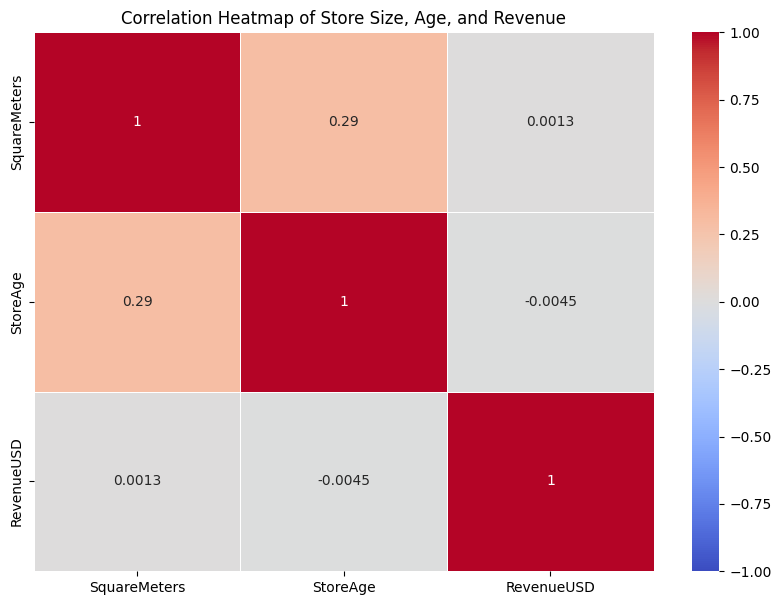

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter and calculate the correlation matrix
filtered_df = df_finalMerged[(df_finalMerged['SquareMeters'] != 0) & (df_finalMerged['StoreAge'] != 0)]
correlation_matrix = filtered_df[['SquareMeters', 'StoreAge', 'RevenueUSD']].corr()

# Print the correlation matrix
print(correlation_matrix)

# Create a figure with Matplotlib
plt.figure(figsize=(10, 7))

# Create a heatmap with the correlation matrix using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

# Add titles and labels
plt.title('Correlation Heatmap of Store Size, Age, and Revenue')

# Show the plot
plt.show()

Clearly there is no co-relation between the RevenueUSD and StoreAge and StoreSquarefeet

In [42]:
# Can see Store with Most Revenue and it's Location

# Group by StoreKey,Country,State and sum the ProfitUSD
store_profit = df_finalMerged.groupby(['StoreKey', 'Country_store','State_store'])['ProfitUSD'].sum()

# Sort the stores by profit in descending order
top_stores = store_profit.sort_values(ascending=False).head(50)

# Convert to DataFrame for better readability
top_stores_df = top_stores.reset_index()

# Display results
print(top_stores_df)

    StoreKey   Country_store                   State_store   ProfitUSD
0          0          Online                        Online  6672692.64
1         55   United States                        Nevada   830551.75
2         50   United States                        Kansas   819659.12
3         54   United States                      Nebraska   810300.06
4         57   United States                    New Mexico   784095.76
5          9          Canada         Northwest Territories   774757.55
6         61   United States                South Carolina   764997.20
7         45   United States                   Connecticut   761271.82
8         59   United States                        Oregon   754702.32
9         64   United States                 Washington DC   745283.99
10        43   United States                        Alaska   741093.00
11        66   United States                       Wyoming   723190.21
12         8          Canada     Newfoundland and Labrador   723081.21
13    

Online Store is the highest performer by itself by a significant margin, with a profit of $6,672,692.64. This indicates that the online store has the highest profitability compared to physical stores.

It also shows that majority of profits made from physical stores are located in USA with Canada being in the picture as well especially from the Northwest Territories. But it is important to note that the profits made from Online are the highest.

In [16]:
import pandas as pd

# Ensure 'OrderDate' is in datetime format
df_finalMerged['OrderDate'] = pd.to_datetime(df_finalMerged['OrderDate'])

# Set 'OrderDate' as the index
df_finalMerged.set_index('OrderDate', inplace=True)

# Group by 'OrderDate' and calculate total revenue per day
daily_revenue = df_finalMerged.resample('D')['RevenueUSD'].sum().reset_index()

# Calculate the average revenue per day
average_daily_revenue = daily_revenue['RevenueUSD'].median()
print(f'Average Revenue Per Day: ${average_daily_revenue:.2f}')

# Resample by week and calculate total revenue per week
weekly_revenue = df_finalMerged.resample('W')['RevenueUSD'].sum().reset_index()

# Calculate the average revenue per week
average_weekly_revenue = weekly_revenue['RevenueUSD'].median()
print(f'Average Revenue Per Week: ${average_weekly_revenue:.2f}')

# Resample by month and calculate total revenue per month
monthly_revenue = df_finalMerged.resample('M')['RevenueUSD'].sum().reset_index()

# Calculate the average revenue per month
average_monthly_revenue = monthly_revenue['RevenueUSD'].median()
print(f'Average Revenue Per Month: ${average_monthly_revenue:.2f}')

# Resample by year and calculate total revenue per year
yearly_revenue = df_finalMerged.resample('Y')['RevenueUSD'].sum().reset_index()

# Calculate the average revenue per year
average_yearly_revenue = yearly_revenue['RevenueUSD'].mean()
print(f'Average Revenue Per Year: ${average_yearly_revenue:.2f}')

Average Revenue Per Day: $22642.65
Average Revenue Per Week: $160329.93
Average Revenue Per Month: $672552.73
Average Revenue Per Year: $9292579.93


C:\Users\DELL\AppData\Local\Temp\ipykernel_24968\2080707769.py:24: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\DELL\AppData\Local\Temp\ipykernel_24968\2080707769.py:31: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



In [17]:
import pandas as pd
import plotly.express as px

# # Ensure 'OrderDate' is in datetime format
# df_finalMerged['OrderDate'] = pd.to_datetime(df_finalMerged['OrderDate'])

# # Set 'OrderDate' as the index
# df_finalMerged.set_index('OrderDate', inplace=True)

# Resample by month and calculate total revenue
monthly_revenue = df_finalMerged.resample('M')['RevenueUSD'].sum().reset_index()

# Plotting with Plotly
fig = px.line(
    monthly_revenue, 
    x='OrderDate', 
    y='RevenueUSD', 
    title='Monthly RevenueUSD',
    labels={'OrderDate': 'Order Date', 'RevenueUSD': 'Revenue USD'},
    line_shape='linear',
    markers=True
)

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Order Date',
    yaxis_title='Revenue USD',
    xaxis=dict(
        tickangle=-45,  # Rotate x-axis labels for better readability
        tickformat='%Y-%m'  # Format the date to Year-Month
    ),
    yaxis=dict(
        title='Revenue USD'
    ),
    title='Monthly Revenue USD'
)

fig.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_24968\2860789449.py:11: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [52]:
import pandas as pd

# Load data
df_finalMerged = pd.read_csv('cleaned_datasets/FinalMerged_data.csv')

# Check and process the 'OrderDate' column
if 'OrderDate' in df_finalMerged.columns:
    df_finalMerged['OrderDate'] = pd.to_datetime(df_finalMerged['OrderDate'])
elif 'order_date' in df_finalMerged.columns:
    df_finalMerged['OrderDate'] = pd.to_datetime(df_finalMerged['order_date'])
else:
    print("Date column not found in DataFrame.")
    raise KeyError("Column 'OrderDate' or 'order_date' not found.")

# Extract month from the 'OrderDate'
df_finalMerged['Month'] = df_finalMerged['OrderDate'].dt.month

# Calculate total revenue for each month
monthly_revenue = df_finalMerged.groupby('Month')['RevenueUSD'].sum().sort_index()

# Print total revenue for each month
for month, revenue in monthly_revenue.items():
    print(f'Total Revenue for Month {month}: ${revenue:,.2f}')

Total Revenue for Month 1: $6,759,981.20
Total Revenue for Month 2: $7,842,476.23
Total Revenue for Month 3: $2,625,522.85
Total Revenue for Month 4: $607,334.05
Total Revenue for Month 5: $4,757,983.80
Total Revenue for Month 6: $4,293,036.54
Total Revenue for Month 7: $3,852,415.81
Total Revenue for Month 8: $4,085,169.32
Total Revenue for Month 9: $4,363,863.61
Total Revenue for Month 10: $4,315,027.44
Total Revenue for Month 11: $4,756,059.88
Total Revenue for Month 12: $7,496,608.86


In [11]:
import plotly.express as px

# Data
months = [f'Month {i}' for i in range(1, 13)]
revenue = [6759981.20, 7842476.23, 2625522.85, 607334.05, 4757983.80, 4293036.54,
           3852415.81, 4085169.32, 4363863.61, 4315027.44, 4756059.88, 7496608.86]

# Area chart
fig = px.area(x=months, y=revenue,
              labels={'x': 'Month', 'y': 'Total Revenue in USD'},
              title='Total Revenue by Month')

# Customize layout
fig.update_layout(xaxis_title='Month', yaxis_title='Total Revenue (USD)')

# Show the plot
fig.show()

### **Observations:**

**Highest Revenue:** February (Month 2) had the highest revenue of USD 7.842M. Lowest Revenue: April (Month 4) had the lowest revenue of USD 0.607M.

There seems to be a significant increase in revenue towards the end of the year (Months 10 to 12).
Revenue fluctuates throughout the year, with noticeable peaks in specific months.

### **Solutions:**

Implement strategies to boost revenue during low-performing months (e.g., April). This could include targeted promotions, discounts, or marketing campaigns to increase customer engagement during these periods.

Prepare for high-revenue months (e.g., December) by ensuring adequate inventory, staffing, and operational capacity to handle increased demand efficiently.